# Clase 9 - Backpropagation

## Ejercicio 1

Dado el siguiente diagrama y asumiendo que las neuronas de salida tienen errores de 3 y 10 respectivamente, calcule el término de error (delta minúscula) simplificado para cada una de las neuronas del diagrama.

![error_simplificado](Imagenes/back-propagation-1.png)

**Capa 2**

- Delta Neurona 1: 3*(-0.23) + 10*(0.9) = 8.31
- Delta Neurona 2: 3*(0.22) + 10*(0.88) = 9.46
- Delta Neurona 3: 3*(0.77) + 10*(-0.4) = -1.69

**Capa 1**

- Delta Neurona 1: 8.31*(-0.3) + 9.46*(0.45) - 1.69*(0.69) = 0.5979
- Delta Neurona 2: 8.31*(0.62) + 9.46*(0.57) - 1.69*(0.58) = 9.5642
- Delta Neurona 3: 8.31*(0.45) + 9.46*(0.48) - 1.69*(-0.45) = 9.0408

**Capa 0 (Entradas)** 

- Delta Neurona 1: 0.5979*(0.3) + 9.5642*(0.22) + 9.0408*(0.65) = 8.16
- Delta Neurona 2: 0.5979*(0.46) + 9.5642*(-0.7) + 9.0408*(0.9) = 1.7168
- Delta Neurona 3: 0.5979*(0.02) + 9.5642*(0.65) + 9.0408*(0.34) = 9.3026


## Ejercicio 2: Entrenamiento Completo de XOR con NN

Previamente se había diseñado la fase de forward propagation de una compuerta XOR. Ahora se realiza el proceso completo de entrenamiento de una red encargada de aproximar la función XOR. Dicho aproximador debe contar con dos capas intermedias: La primera con al menos 2 neuronas y la segunda siempre con 2 neuronas. Para ambas emplear la función de activación ReLu. No acoplar ningún tipo de función de activación en la salida. Para esto se debe utilizar Numpy únicamente.

<center>
    <img src="Imagenes/XOR_nn_backprop.PNG" alt="XOR_nn" width="600px" alignment="center">
</center>

En total se deben realizar 5 experimentos. En cada experimento:

- Inicializar los parámetros aleatoriamente con distribución normal centrada en 0 y desviación estándar de 0.1.
- Retornar la representación intermedia de la segunda capa oculta.

Graficar las 5 representaciones intermedias, comparar, comentar y/o concluir.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetXOR():

    # Método: Ejecutado al crear una instancia de la clase
    def __init__(self, first_hiddenLayer_neurons = 3) -> None:

        # Se inicializan los pesos y biases con valores normalmente distribuidos
        # centrados en 0 y con una desviación estándar de 0.1.

        # ----------
        # CAPA 1
        # ----------

        # Dims X: (Nx2)
        # Dims Wc1: (2x3) o (2 Entradas x 3 Neuronas en Primera Capa Intermedia)
        # NOTA: El número de neuronas en la primera capa intermedia puede variar
        self.Wc1 = np.random.normal(loc=0, scale=0.1, size=(2, first_hiddenLayer_neurons))

        # Bias de capa 1
        self.Bc1 = np.random.normal(loc=0, scale=0.1, size=(1, first_hiddenLayer_neurons))

        # ----------
        # CAPA 2
        # ----------

        # Dims Wc2: (3x2) o (3 Neuronas en Primera Capa Intermedia x 2 Neuronas en Segunda Capa Intermedia)
        # NOTA: El número de neuronas en la primera capa intermedia puede variar
        self.Wc2 = np.random.normal(loc=0, scale=0.1, size=(first_hiddenLayer_neurons, 2))

        # Bias de capa 2
        self.Bc2 = np.random.normal(loc=0, scale=0.1, size=(1, 2))

        # ----------
        # CAPA 3
        # ----------

        # Dims Wc3: (2x1) o (2 Neuronas en Segunda Capa Intermedia x 1 Neurona de Salida)
        self.Wc3 = np.random.normal(loc=0, scale=0.1, size=(2, 1))

        # Bias de capa 3
        self.Bc3 = np.random.normal(loc=0, scale=0.1, size=(1, 1))

        # ----------
        # LOGITS
        # ----------

        # Salidas de neurona antes de pasar por la función de activación
        self.Z1 = 0
        self.Z2 = 0
        self.Z3 = 0

        # ----------
        # ACTIVACIONES
        # ----------

        # Salidas de neurona luego de pasar por la función de activación
        self.A1 = 0
        self.A2 = 0

    # Método: Forward Propagation de la Red
    def forwardProp(self, X):
        
        # Función de activación: ReLu
        ReLu = lambda x: (abs(x) + x) / 2

        # Función de activación: Lineal
        Linear = lambda x: x

        # ------------
        # FORWARD PROP
        # ------------
        
        # Dims Z1: (Nx2)(2x3) = (Nx3)
        self.Z1 = X @ self.Wc1 + self.Bc1
        self.A1 = ReLu(self.Z1)

        # Dims Z2: (Nx3)(3x2) = (Nx2)
        self.Z2 = self.A1 @ self.Wc2 + self.Bc2
        self.A2 = ReLu(self.Z2)

        # Dims Z3: (Nx2)(2x1) = (Nx1)
        self.Z3 = self.A2 @ self.Wc3 + self.Bc3
        y_pred = Linear(self.Z3)

        # Retorna la salida y las activaciones de la segunda capa
        return y_pred

    # Método: Backward Propagation de la Red
    def backwardProp(self, X, y, y_pred, lr):

        # Función de costo: MSE
        Cost = lambda y, y_pred: np.mean((y - y_pred)**2, keepdims=True)

        # Derivada de función de costo: MSE
        Cost_prime = lambda y, y_pred: -2 * np.mean(y - y_pred, axis=1, keepdims=True)

        # Derivada de función de activación: ReLu
        ReLu_prime = lambda z: (z > 0) * 1

        # Derivada de función de activación: Lineal
        Linear_prime = lambda z: 1

        # ------------
        # ERROR
        # ------------

        # Se calcula el error de la predicción y se promedia
        error = Cost(y, y_pred)

        # ------------
        # BACKWARD PROP
        # ------------

        # dC/dy: Derivada parcial del costo con respecto de las salidas de la red (y_pred)
        # Dims: (Nx1)
        dC_dy = Cost_prime(y, y_pred)

        # Delta3: dC/dy * ReLu'(Z3)
        # Dims: (Nx1) * (Nx1) = (Nx1)
        Delta3 = dC_dy * Linear_prime(self.Z3)

        # Delta2: (Wc3)(Delta3) * ReLu'(Z2)
        # Dims: (Nx1)(2x1)T * (Nx2) = (Nx2)
        Delta2 = Delta3 @ self.Wc3.T * ReLu_prime(self.Z2)

        # Delta 1: (Wc2)(Delta2) * ReLu'(Z1)
        # Dims: (Nx2)(3x2)T * (Nx3) = (Nx3)
        Delta1 = Delta2 @ self.Wc2.T * ReLu_prime(self.Z1)

        # Valores para actualizar los biases
        # dC/dB: Derivada parcial del costo respecto a los biases
        dC_dBc1 = np.mean(Delta1, axis=0, keepdims=True)            # (Nx3) -> Promediado = (1x3)
        dC_dBc2 = np.mean(Delta2, axis=0, keepdims=True)            # (Nx2) -> Promediado = (1x2)
        dC_dBc3 = np.mean(Delta3, axis=0, keepdims=True)            # (Nx1) -> Promediado = (1x1)

        # Valores para actualizar los pesos
        # dC/dW: Derivada parcial del costo respecto de los pesos
        dC_dWc1 =       X.T @ Delta1              # (Nx2)T (Nx3) = (2x3) = Dims Wc1
        dC_dWc2 = self.A1.T @ Delta2              # (Nx3)T (Nx2) = (3x2) = Dims Wc2
        dC_dWc3 = self.A2.T @ Delta3              # (Nx2)T (Nx1) = (2x1) = Dims Wc3

        # Se actualizan los pesos usando line search
        self.Wc1 = self.Wc1 - lr * dC_dWc1
        self.Wc2 = self.Wc2 - lr * dC_dWc2
        self.Wc3 = self.Wc3 - lr * dC_dWc3

        # Se actualizan los biases usando line search
        self.Bc1 = self.Bc1 - lr * dC_dBc1
        self.Bc2 = self.Bc2 - lr * dC_dBc2
        self.Bc3 = self.Bc3 - lr * dC_dBc3

        return error

    # Método: Entrenar a la Red Neuronal
    def fit(self, X, y, epsilon=0.01, max_iter=200, lr=0.0001, verbose=True):
        
        # Historial del error del modelo
        error_historial = []

        # Inicialmente el error es infinito
        error = np.Inf

        # El número de iteración se inicializa en 0
        iter = 0

        # Mientras el error sea mayor al epsilon deseado o no se haya alcanzado 
        # el número máximo de iteraciones
        while (error > epsilon) and (iter < max_iter):

            # Se realiza el paso de forward propagation
            y_pred = self.forwardProp(X)

            # Se actualizan los pesos utilizando backward propagation
            error = self.backwardProp(X, y, y_pred, lr)

            # Se incrementa el número de iteración
            iter += 1

            # Se agrega un elemento al historial de errores
            error_historial.append(error.item())

            # Imprimir cada cierta cantidad de iteraciones
            if (iter % 10 == 0) and verbose:
                print(f"Iteración: {iter} | Error: {error}")

        print("Proceso de Entrenamiento Finalizado")
        return error_historial, self.A2

    # Método: Predecir utilizando los parámetros entrenados
    def predict(self, X): 
        
        # Se retornan los resultados obtenidos al realizar un forward pass
        return self.forwardProp(X)

Se emplea el modelo anterior para entrenar a un aproximador de una función XOR

Proceso de Entrenamiento Finalizado


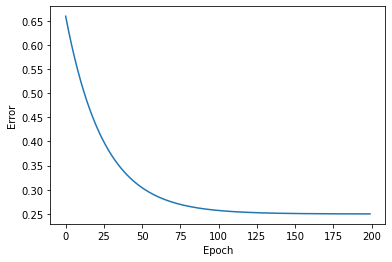

In [38]:
# Tabla de verdad de XOR
# Entradas del XOR
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Salidas del XOR
y = np.array([[0, 1, 1, 0]]).T

# Modelo y entrenamiento de red neuronal
nn = NeuralNetXOR(first_hiddenLayer_neurons=4)
error, A2 = nn.fit(X, y, lr=0.01, max_iter=200, verbose=False)

# Predicción de la red neuronal
y_hat = nn.predict(X)

# Se grafica el error
plt.plot(error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

Se comparan las salidas reales de un XOR, con las del aproximador.

In [39]:
# Se concatenan los datos en un array y se convierten a un dataframe
DataArray = np.hstack((X, y, y_hat, y == y_hat))
df = pd.DataFrame(DataArray, columns=['Input 1', ' Input 2', 'Output Real', 'Output Predicho', 'Correcto'])

# Se presentan los resultados de la predicción
df

,Input 1,Input 2,Output Real,Output Predicho,Correcto
0,0.0,0.0,0.0,0.48875,0.0
1,0.0,1.0,1.0,0.48875,0.0
2,1.0,0.0,1.0,0.48875,0.0
3,1.0,1.0,0.0,0.48875,0.0


Se visualiza la segunda capa intermedia de la red neuronal

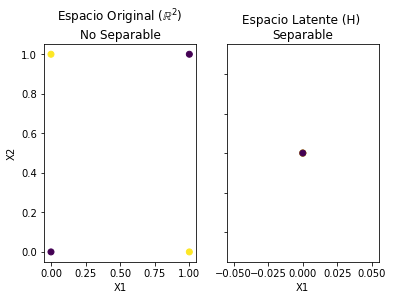

In [40]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(X[:,0], X[:,1], c=y)
axs[0].set_title('Espacio Original ($\mathbb{R}^2$) \nNo Separable')
axs[1].scatter(A2[:,0], A2[:,1], c=y)
axs[1].set_title('Espacio Latente (H) \nSeparable')

# Coloca X y Y labels comunes
for ax in axs.flat:
    ax.set(xlabel='X1', ylabel='X2')

# Esconde las X labels y los ticks para los plots de arriba y los ticks en Y para los que están a la derecha
for ax in axs.flat:
    ax.label_outer()